## Question 1: Use yfinance to extract stock data

In [2]:
import yfinance as yf

In [3]:
tesla = yf.Ticker("TSLA")

In [4]:
tesla_data = tesla.history(period = "max")

In [5]:
tesla_data.reset_index(inplace = True)

In [6]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to extract Tesla revenue data

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [50]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}

In [64]:
html_data = requests.get(url, headers = headers).text
soup = BeautifulSoup(html_data, 'html.parser')
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

In [66]:
for row in soup.find('tbody').find_all('tr'):
    cells = row.find_all('td')
    date = cells[0].text
    revenue = cells[1].text
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({'Date':[date], 'Revenue':[revenue]})], ignore_index = True)

In [68]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('[^0-9]', '', regex = True)

In [70]:
tesla_revenue.tail()

,Date,Revenue
10,2013,2013
11,2012,413
12,2011,204
13,2010,117
14,2009,112


## Question 3: Use yfinance to extract stock data

In [167]:
GameStop = yf.Ticker("GME")

In [169]:
gme_data = GameStop.history(period = 'max')

In [170]:
gme_data.reset_index(inplace = True)

In [173]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to extract GME revenue data

In [176]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [178]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}

In [180]:
html_data = requests.get(url, headers = headers).text
soup = BeautifulSoup(html_data, 'lxml')

ConnectionError: HTTPSConnectionPool(host='cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud', port=443): Max retries exceeded with url: /IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001E25725DE10>: Failed to resolve 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud' ([Errno 11001] getaddrinfo failed)"))

In [185]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])
for row in soup.find_all('tbody')[1].find_all('tr'):
    cells = row.find_all('td')
    date = cells[0].text
    revenue = cells[1].text
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({'Date':[date], 'Revenue':[revenue]})], ignore_index = True)

In [187]:
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('[^0-9]', '', regex = True)

In [189]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph

In [192]:
import matplotlib.pyplot as plt

In [194]:
def make_graph(data, title):
    data.plot(x = 'Date', y = 'Open', title = title)
    plt.show()

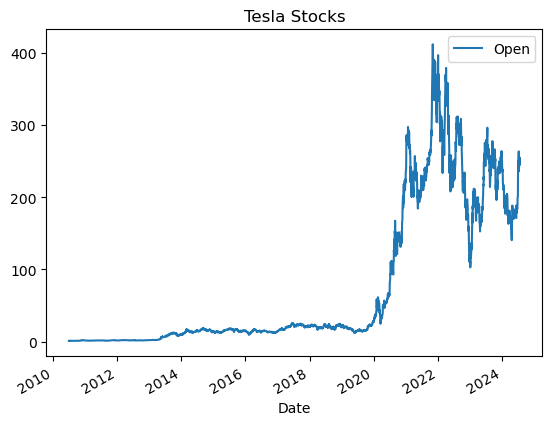

In [196]:
make_graph(tesla_data, "Tesla Stocks")

## Question 6: Plot GameStop Stock Graph

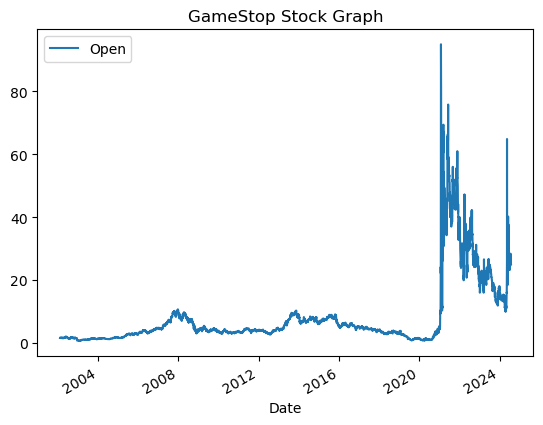

In [199]:
make_graph(gme_data, "GameStop Stock Graph")

In [201]:
import os

In [203]:
os.getcwd()

'C:\\Users\\HP\\Jupyter Files\\DataAnalyticsBasics'